In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassNeuronaGral import NeuronaGradiente

In [2]:
# Leer FrutasTrain.csv
datos = pd.read_csv("../Datos/FrutasTrain.csv")
nColum = list(datos.columns.values)

#--- DATOS DE ENTRENAMIENTO ---
X = np.array(datos.iloc[:,0:2])
normalizarEntrada = 1

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    normalizador = preprocessing.MinMaxScaler()
    X = normalizador.fit_transform(X)
X = 2*X-1    
#--- SALIDA BINARIA ---
T = datos['Clase'] == 'Melon'  #es boolean
T = np.array(T * 1)  #lo convierte en binario

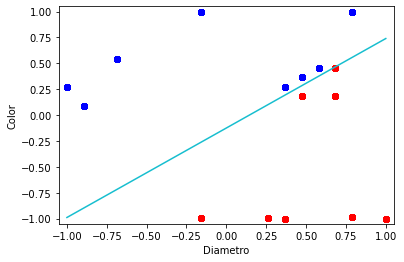

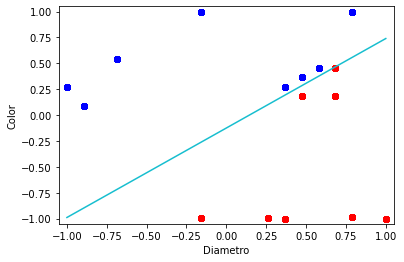

In [3]:
ppn = NeuronaGradiente(alpha=0.1, n_iter=50, cotaE=10e-07, FUN='sigmoid', random_state=None, draw=1, title=nColum[0:2])
ppn.fit(X, T)

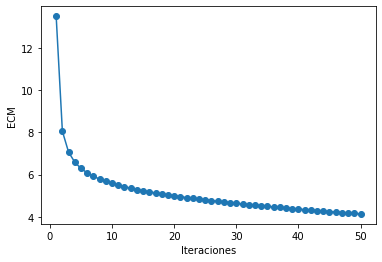

In [4]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

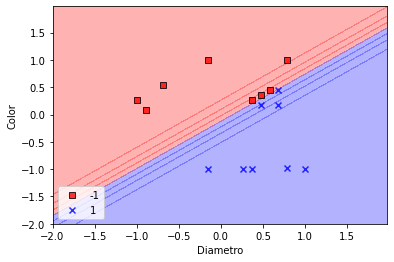

In [5]:
from PlotRegiones import plot_decision_regions

plot_decision_regions(X, T, classifier=ppn)
plt.xlabel(ppn.title[0])
plt.ylabel(ppn.title[1])
plt.legend(loc='lower left')
plt.show()

In [7]:
Y = ppn.predict(X)
print("Y = ", Y)
print("T = ", T)
aciertos = sum(Y == T)
print("aciertos = ", aciertos)
nAciertos = sum(Y==T)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X.shape[0]))


Y =  [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
T =  [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
aciertos =  16
% de aciertos = 100.00 %
